In [53]:
import pandas as pd
from ydata_profiling import ProfileReport
import ipywidgets
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

# Exploratory Data Analysis (EDA) 
# DrivenData: Richter's Predictor: Modeling Earthquake Damage
# EDA of `has_secondary_use`

In [38]:
# import data

file_submission_format = ('../data/submission_format.csv')
submission_format = pd.read_csv(file_submission_format)

# The test values
file_test_values = ('../data/test_values.csv')
test_values = pd.read_csv(file_test_values, index_col='building_id')

# The training labels
file_train_labels = ('../data/train_labels.csv')
train_labels = pd.read_csv(file_train_labels, index_col='building_id')

# The training features
file_train_values = ('../data/train_values.csv')
train_values = pd.read_csv(file_train_values, index_col='building_id')

In [39]:
train_values

geo_level_1_id  geo_level_2_id  geo_level_3_id  \
building_id                                                   
802906                    6             487           12198   
28830                     8             900            2812   
94947                    21             363            8973   
590882                   22             418           10694   
201944                   11             131            1488   
...                     ...             ...             ...   
688636                   25            1335            1621   
669485                   17             715            2060   
602512                   17              51            8163   
151409                   26              39            1851   
747594                   21               9            9101   

             count_floors_pre_eq  age  area_percentage  height_percentage  \
building_id                                                                 
802906                         2   30                6                  5   
28830                          2   10                8                  7   
94947                          2   10                5                  5   
590882                         2   10                6                  5   
201944                         3   30                8                  9   
...                          ...  ...              ...                ...   
688636                         1   55                6                  3   
669485                         2    0                6                  5   
602512                         3   55                6                  7   
151409                         2   10               14                  6   
747594                         3   10                7                  6   

            land_surface_condition foundation_type roof_type  ...  \
building_id                                                   ...   
802906                           t               r         n  ...   
28830                            o               r         n  ...   
94947                            t               r         n  ...   
590882                           t               r         n  ...   
201944                           t               r         n  ...   
...                            ...             ...       ...  ...   
688636                           n               r         n  ...   
669485                           t               r         n  ...   
602512                           t               r         q  ...   
151409                           t               r         x  ...   
747594                           n               r         n  ...   

            has_secondary_use_agriculture has_secondary_use_hotel  \
building_id                                                         
802906                                  0                       0   
28830                                   0                       0   
94947                                   0                       0   
590882                                  0                       0   
201944                                  0                       0   
...                                   ...                     ...   
688636                                  0                       0   
669485                                  0                       0   
602512                                  0                       0   
151409                                  0                       0   
747594                                  0                       0   

            has_secondary_use_rental has_secondary_use_institution  \
building_id                                                          
802906                             0                             0   
28830                              0                             0   
94947                              0                             0   
590882                             0         

In [40]:
train_labels

damage_grade
building_id              
802906                  3
28830                   2
94947                   3
590882                  2
201944                  3
...                   ...
688636                  2
669485                  3
602512                  3
151409                  2
747594                  3

[260601 rows x 1 columns]

In [49]:
profile = ProfileReport(train_values, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
train_values.describe()

geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  \
count   260601.000000   260601.000000   260601.000000        260601.000000   
mean        13.900353      701.074685     6257.876148             2.129723   
std          8.033617      412.710734     3646.369645             0.727665   
min          0.000000        0.000000        0.000000             1.000000   
25%          7.000000      350.000000     3073.000000             2.000000   
50%         12.000000      702.000000     6270.000000             2.000000   
75%         21.000000     1050.000000     9412.000000             2.000000   
max         30.000000     1427.000000    12567.000000             9.000000   

                 age  area_percentage  height_percentage  \
count  260601.000000    260601.000000      260601.000000   
mean       26.535029         8.018051           5.434365   
std        73.565937         4.392231           1.918418   
min         0.000000         1.000000           2.000000   
25%        10.000000         5.000000           4.000000   
50%        15.000000         7.000000           5.000000   
75%        30.000000         9.000000           6.000000   
max       995.000000       100.000000          32.000000   

       has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
count                 260601.000000                        260601.000000   
mean                       0.088645                             0.761935   
std                        0.284231                             0.425900   
min                        0.000000                             0.000000   
25%                        0.000000                             1.000000   
50%                        0.000000                             1.000000   
75%                        0.000000                             1.000000   
max                        1.000000                             1.000000   

       has_superstructure_stone_flag  ...  has_secondary_use_agriculture  \
count                  260601.000000  ...                  260601.000000   
mean                        0.034332  ...                       0.064378   
std                         0.182081  ...                       0.245426   
min                         0.000000  ...                       0.000000   
25%                         0.000000  ...                       0.000000   
50%                         0.000000  ...                       0.000000   
75%                         0.000000  ...                       0.000000   
max                         1.000000  ...                       1.000000   

       has_secondary_use_hotel  has_secondary_use_rental  \
count            260601.000000             260601.000000   
mean                  0.033626                  0.008101   
std                   0.180265                  0.089638   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   0.000000                  0.000000   
max                   1.000000                  1.000000   

       has_secondary_use_institution  has_secondary_use_school  \
count                  260601.000000             260601.000000   
mean                        0.000940                  0.000361   
std                         0.030647                  0.018989   
min                         0.000000                  0.000000   
25%                         0.000000                  0.000000   
50%                         0.000000                  0.000000   
75%                         0.000000                  0.000000   
max                         1.000000                  1.000000   

       has_secondary_use_industry  has_secondary_use_health_post  \
count               260601.000000                  260601.000000   
mean                     0.001071                       0.000188   
std                      0.032703                    

In [43]:
train_values.has_secondary_use.dtype

dtype('int64')

In [44]:
# check if any has_secondary_use* columns are null
train_values.has_secondary_use.isnull().sum()

0

In [45]:
# for loop to check for unique values in has_secondary_use* columns
for col in train_values.columns:
    if 'has_secondary_use' in col:
        print(col, train_values[col].unique())


has_secondary_use [0 1]
has_secondary_use_agriculture [0 1]
has_secondary_use_hotel [0 1]
has_secondary_use_rental [0 1]
has_secondary_use_institution [0 1]
has_secondary_use_school [0 1]
has_secondary_use_industry [0 1]
has_secondary_use_health_post [0 1]
has_secondary_use_gov_office [0 1]
has_secondary_use_use_police [0 1]
has_secondary_use_other [0 1]


In [46]:
# function to convert all has_secondary_use* columns to boolean

def convert_to_bool(df, col):
    df[col] = df[col].astype('bool')

# call function to convert all has_secondary_use* columns to boolean
    
convert_to_bool(train_values, 'has_secondary_use')


# convert all columns has_secondary_use* to boolean
for column in train_values.columns:
    if 'has_secondary_use' in column:
        train_values[column] = train_values[column].astype('bool')


<Axes: >

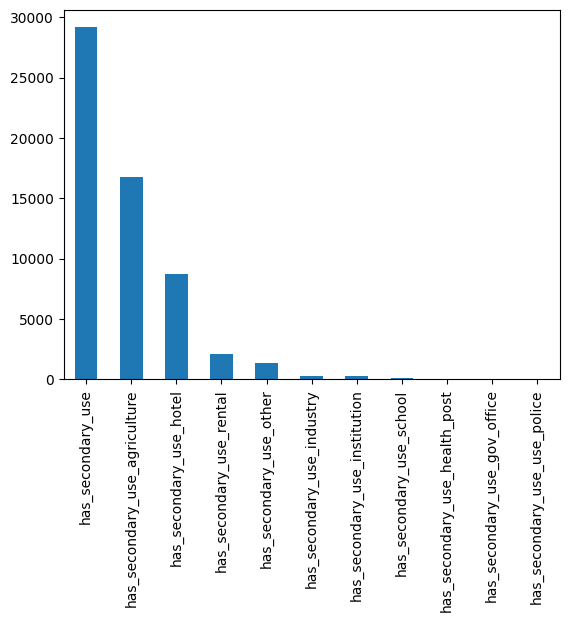

In [47]:

# plot bars in descending order
train_values.filter(like='has_secondary_use').sum().sort_values(ascending=False).plot(kind='bar')



In [48]:
# use plotly express to plot bars in descending order
px.bar(train_values.filter(like='has_secondary_use').sum().sort_values(ascending=False), title='Number of Buildings with Secondary Use', labels={'value':'Number of Buildings', 'index':'Secondary Use Type'})


In [50]:
# descriptive statistics for all boolean columns with has_secondary_use
train_values.filter(like='has_secondary_use').describe()

has_secondary_use has_secondary_use_agriculture  \
count             260601                        260601   
unique                 2                             2   
top                False                         False   
freq              231445                        243824   

       has_secondary_use_hotel has_secondary_use_rental  \
count                   260601                   260601   
unique                       2                        2   
top                      False                    False   
freq                    251838                   258490   

       has_secondary_use_institution has_secondary_use_school  \
count                         260601                   260601   
unique                             2                        2   
top                            False                    False   
freq                          260356                   260507   

       has_secondary_use_industry has_secondary_use_health_post  \
count                      260601                        260601   
unique                          2                             2   
top                         False                         False   
freq                       260322                        260552   

       has_secondary_use_gov_office has_secondary_use_use_police  \
count                        260601                       260601   
unique                            2                            2   
top                           False                        False   
freq                         260563                       260578   

       has_secondary_use_other  
count                   260601  
unique                       2  
top                      False  
freq                    259267